### Importing Libraries

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import math as mt
import matplotlib.pyplot as plt
import warnings
from scipy import stats
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score
import plotly.express as px
%matplotlib inline
warnings.simplefilter(action='ignore')
pd.set_option('display.max_columns', None)
color = sns.color_palette()
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics

### Importing Data

In [7]:
properties_2016 = pd.read_csv('house_data.csv')

### Checking Shape of data

In [8]:
print('Shape of properties_2016: ', properties_2016.shape)

Shape of properties_2016:  (21613, 21)


### Checking Properties of data

In [9]:
properties_2016.head(10)

id             date    price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000   221900         3       1.00         1180   
1  6414100192  20141209T000000   538000         3       2.25         2570   
2  5631500400  20150225T000000   180000         2       1.00          770   
3  2487200875  20141209T000000   604000         4       3.00         1960   
4  1954400510  20150218T000000   510000         3       2.00         1680   
5  7237550310  20140512T000000  1225000         4       4.50         5420   
6  1321400060  20140627T000000   257500         3       2.25         1715   
7  2008000270  20150115T000000   291850         3       1.50         1060   
8  2414600126  20150415T000000   229500         3       1.00         1780   
9  3793500160  20150312T000000   323000         3       2.50         1890   

   sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
0      5650     1.0           0   0.0          3      7        1180   
1      7242     2.0           0   0.0          3      7        2170   
2     10000     1.0           0   0.0          3      6         770   
3      5000     1.0           0   NaN          5      7        1050   
4      8080     1.0           0   NaN          3      8        1680   
5    101930     1.0           0   0.0          3     11        3890   
6      6819     2.0           0   0.0          3      7        1715   
7      9711     1.0           0   0.0          3      7        1060   
8      7470     1.0           0   0.0          3      7        1050   
9      6560     2.0           0   0.0          3      7        1890   

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0              0      1955           0.0    98178  47.5112 -122.257   
1            400      1951        1991.0    98125  47.7210 -122.319   
2              0      1933           NaN    98028  47.7379 -122.233   
3            910      1965           0.0    98136  47.5208 -122.393   
4              0      1987           0.0    98074  47.6168 -122.045   
5           1530      2001           0.0    98053  47.6561 -122.005   
6              0      1995           0.0    98003  47.3097 -122.327   
7              0      1963           0.0    98198  47.4095 -122.315   
8            730      1960           0.0    98146  47.5123 -122.337   
9              0      2003           0.0    98038  47.3684 -122.031   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503  
5           4760      101930  
6           2238        6819  
7           1650        9711  
8           1780        8113  
9           2390        7570

In [10]:
properties_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  int64  
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21588 non-null  float64
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21596 non-null  float64
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

### Copying The Data Sets

In [11]:
final_df = properties_2016.copy()

### Information Of Datasets 

In [12]:
final_df.head()

id             date   price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900         3       1.00         1180   
1  6414100192  20141209T000000  538000         3       2.25         2570   
2  5631500400  20150225T000000  180000         2       1.00          770   
3  2487200875  20141209T000000  604000         4       3.00         1960   
4  1954400510  20150218T000000  510000         3       2.00         1680   

   sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
0      5650     1.0           0   0.0          3      7        1180   
1      7242     2.0           0   0.0          3      7        2170   
2     10000     1.0           0   0.0          3      6         770   
3      5000     1.0           0   NaN          5      7        1050   
4      8080     1.0           0   NaN          3      8        1680   

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0              0      1955           0.0    98178  47.5112 -122.257   
1            400      1951        1991.0    98125  47.7210 -122.319   
2              0      1933           NaN    98028  47.7379 -122.233   
3            910      1965           0.0    98136  47.5208 -122.393   
4              0      1987           0.0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503

In [13]:
final_df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [14]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  int64  
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21588 non-null  float64
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21596 non-null  float64
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [15]:
final_df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21588.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234158      3.409430   
std    4.142051e+04      0.539989      0.086517      0.765971      0.650743   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068800e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  21613.000000  21613.000000   21613.000000  21613.000000  21596.000000   
mean       7.656873   1788.390691     291.509045   1971.005136     84.468698   
std        1.175459    828.090978     442.575043     29.373411    401.830330   
min        1.000000    290.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1190.000000       0.000000   1951.000000      0.000000   
50%        7.000000   1560.000000       0.000000   1975.000000      0.000000   
75%        8.000000   2210.000000     560.000000   1997.000000      0.000000   
max       13.000000   9410.000000    4820.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21613.000000  21613.000000  21613.000000   21613.000000   21613.000000  
mean   98077.939805     47.560053   -122.213896    1986.552492   12768.455652  
std       53.505026      0.138564      0.140828     685.391304   27304.179631  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471000   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.230000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

In [16]:
finaldf=final_df
pd.options.display.max_rows = 65

finaldf = finaldf.dtypes.reset_index()
finaldf.columns = ["Count", "Column Type"]
finaldf

Count Column Type
0              id       int64
1            date      object
2           price       int64
3        bedrooms       int64
4       bathrooms     float64
5     sqft_living       int64
6        sqft_lot       int64
7          floors     float64
8      waterfront       int64
9            view     float64
10      condition       int64
11          grade       int64
12     sqft_above       int64
13  sqft_basement       int64
14       yr_built       int64
15   yr_renovated     float64
16        zipcode       int64
17            lat     float64
18           long     float64
19  sqft_living15       int64
20     sqft_lot15       int64

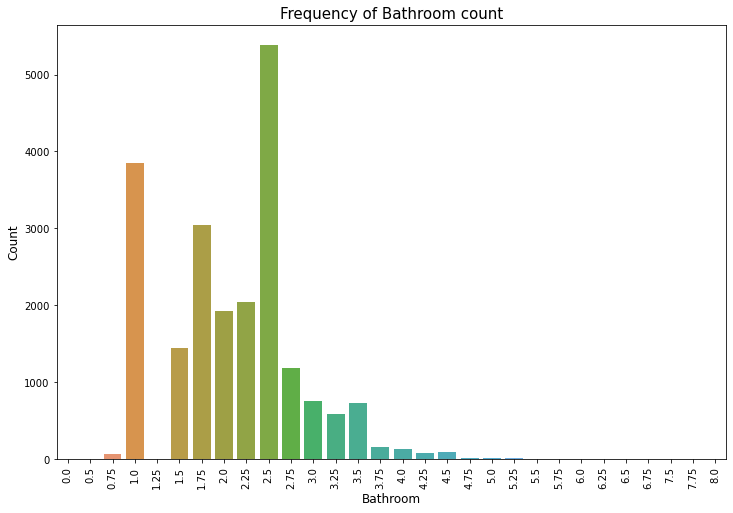

In [17]:
plt.figure(figsize=(12,8))
sns.countplot(x=final_df["bathrooms"], data=final_df)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Bathroom', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of Bathroom count", fontsize=15)
plt.show()

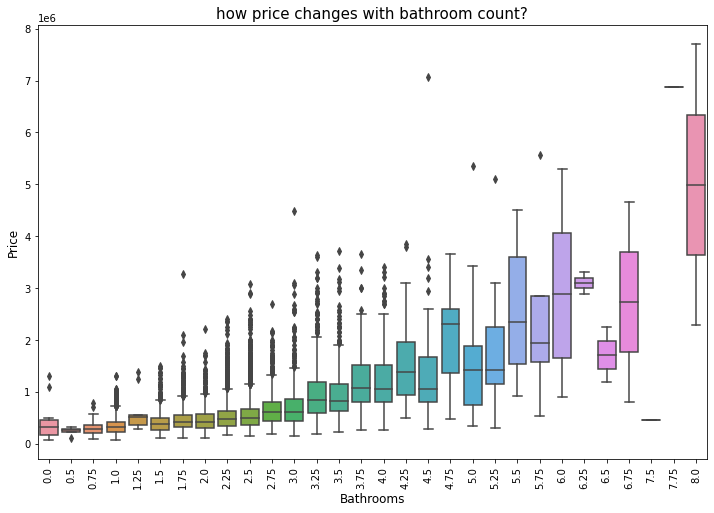

In [18]:
plt.figure(figsize = (12, 8))
sns.boxplot(x = 'bathrooms', y = 'price', data = final_df)
plt.ylabel('Price', fontsize = 12)
plt.xlabel('Bathrooms', fontsize = 12)
plt.xticks(rotation = 'vertical')
plt.title('how price changes with bathroom count?', fontsize = 15)
plt.show()


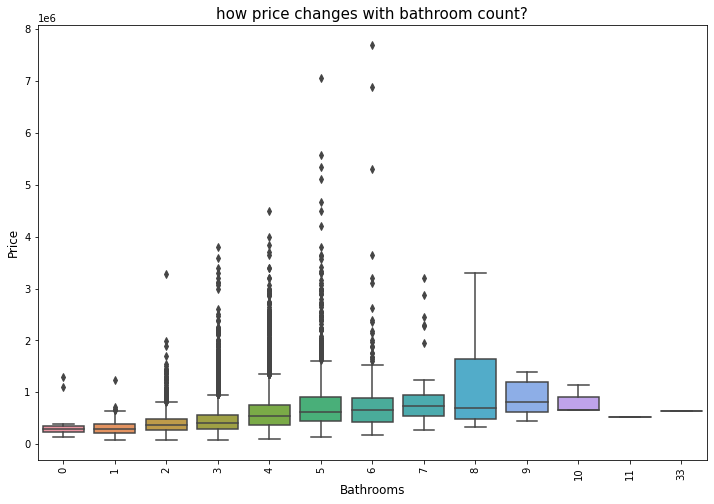

In [19]:
plt.figure(figsize = (12, 8))
sns.boxplot(x = 'bedrooms', y = 'price', data = final_df)
plt.ylabel('Price', fontsize = 12)
plt.xlabel('Bathrooms', fontsize = 12)
plt.xticks(rotation = 'vertical')
plt.title('how price changes with bathroom count?', fontsize = 15)
plt.show()


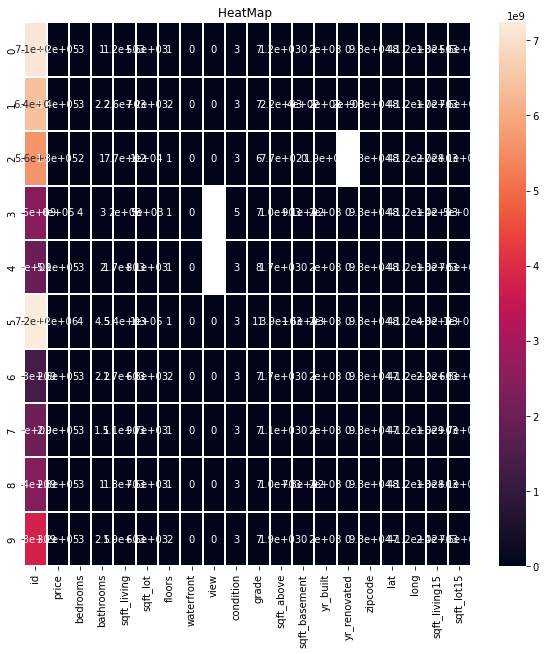

In [20]:
plt.figure(figsize=(10,10))
heat_map = sns.heatmap( final_df[:10].loc[:, final_df[:10].columns!='date'], linewidth = 1 , annot = True)
plt.title( "HeatMap " )
plt.show()

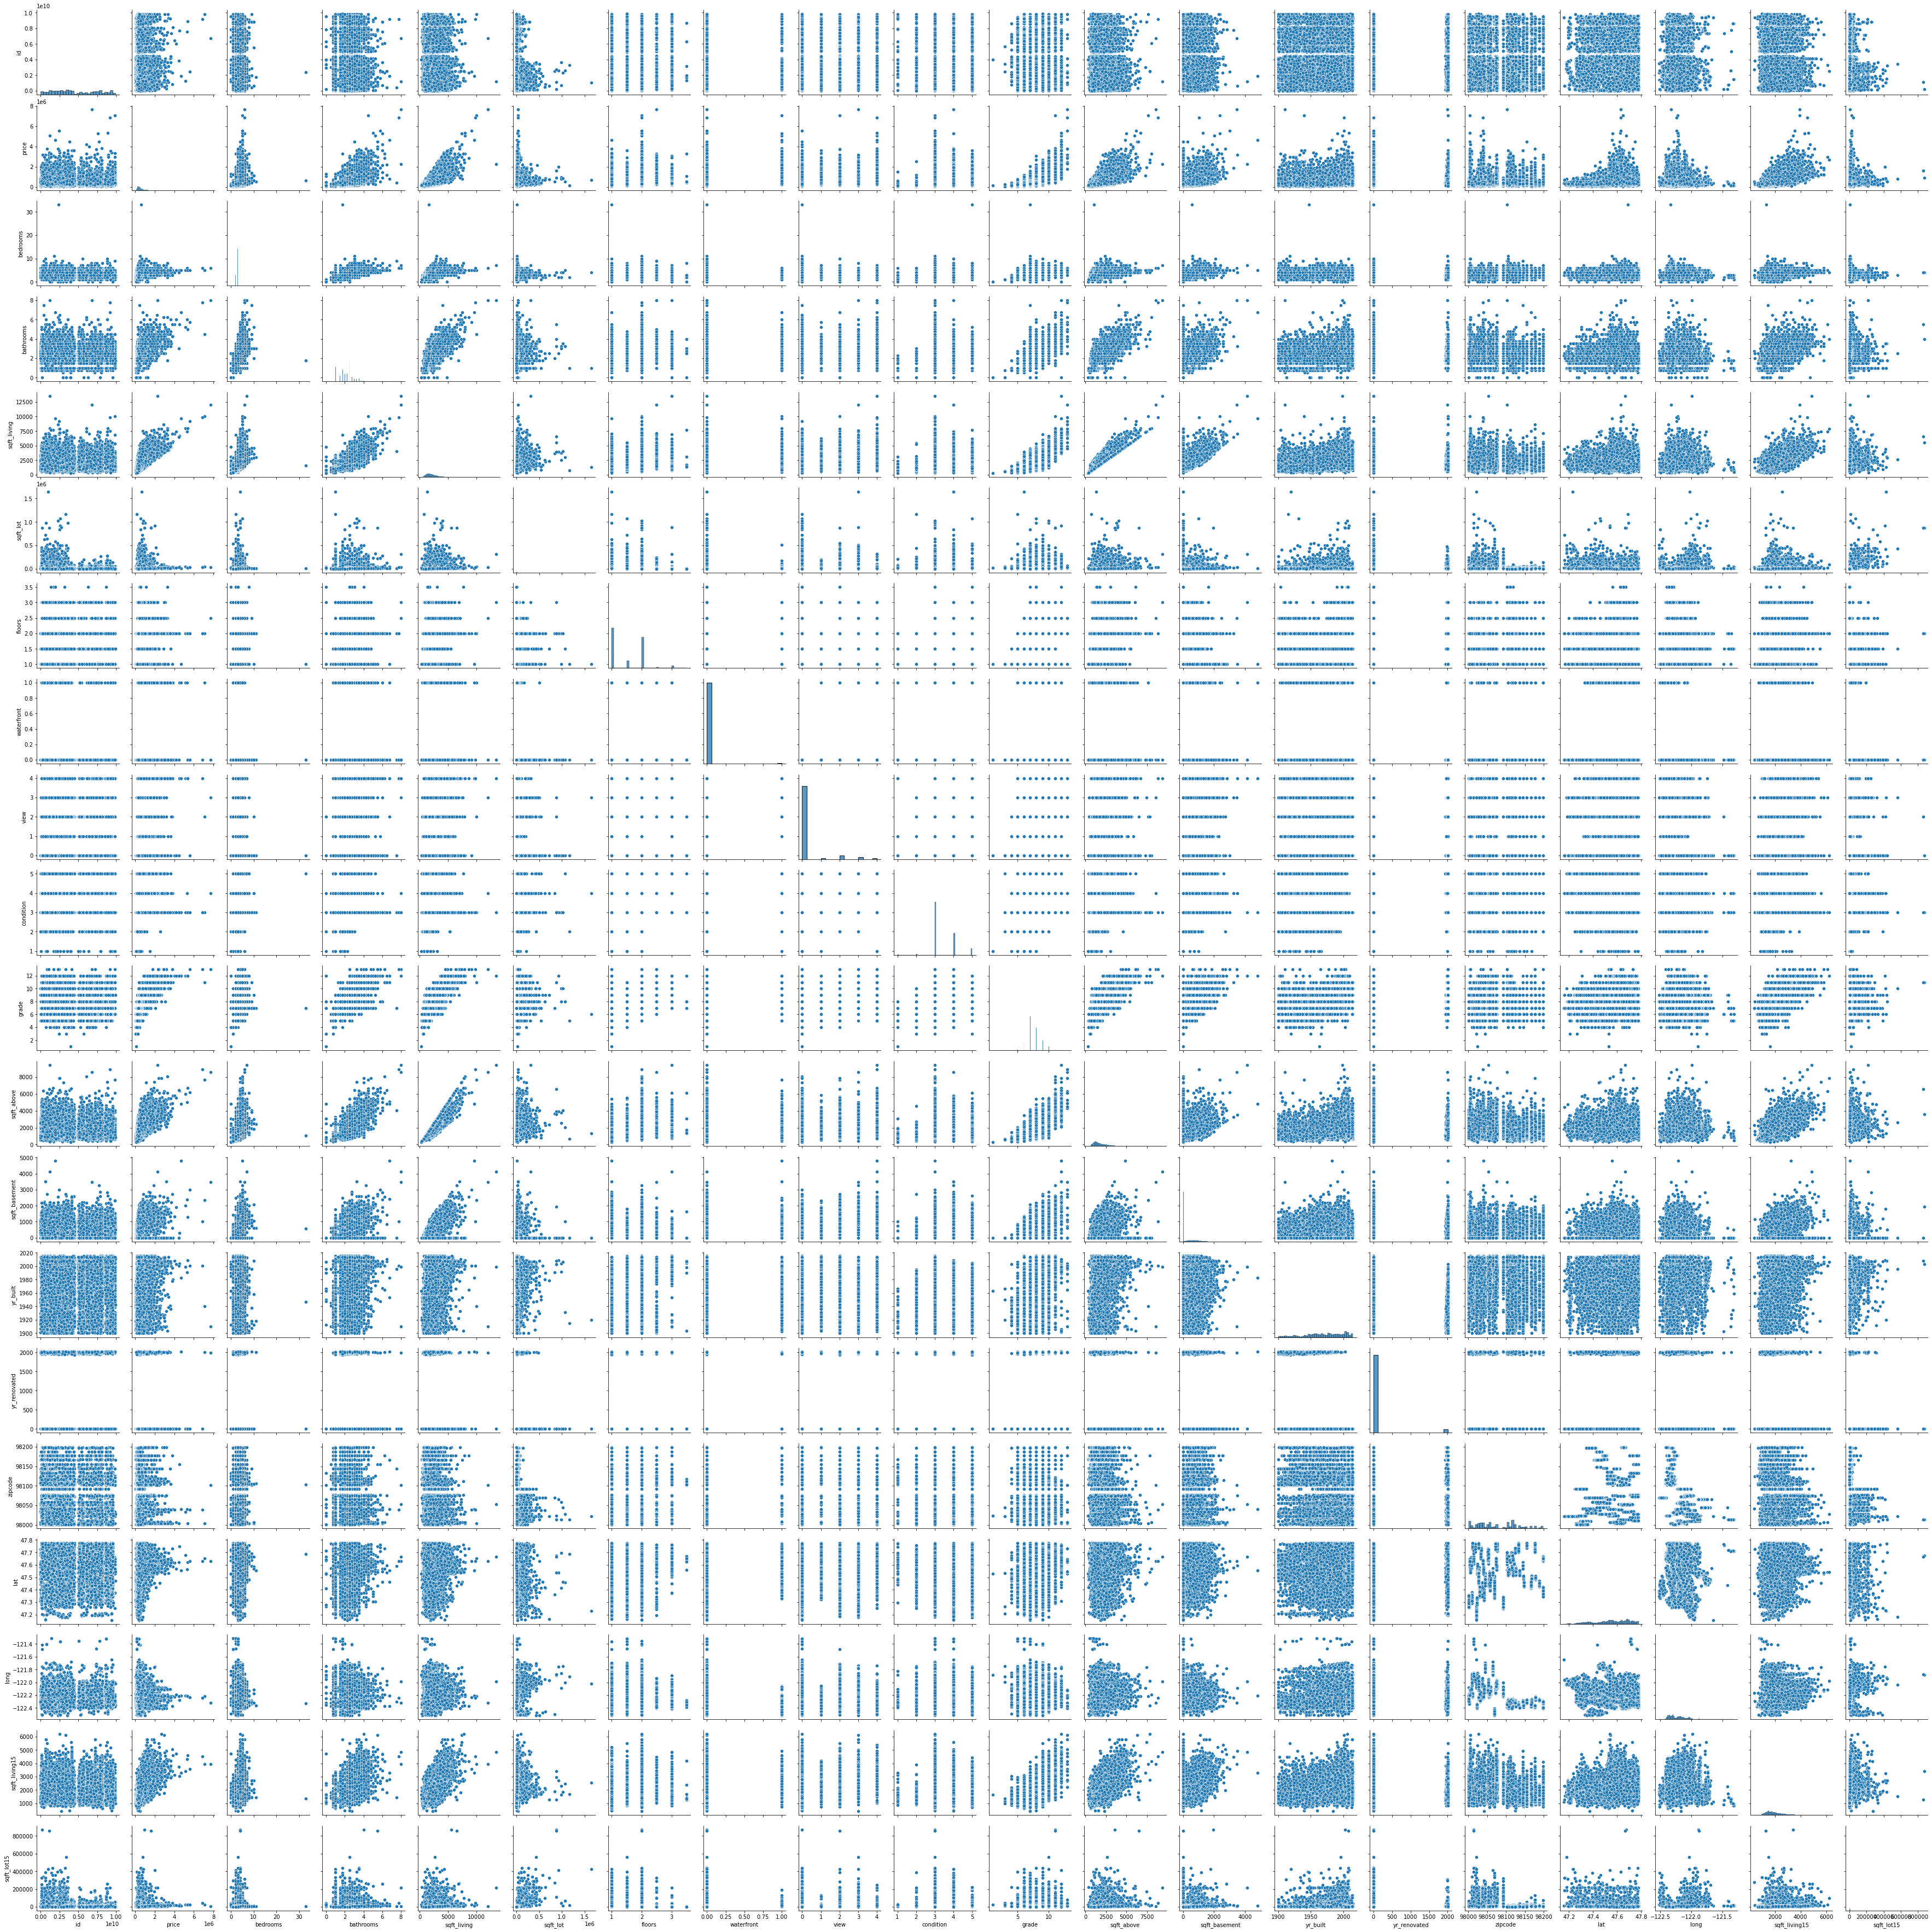

In [21]:
sns.pairplot(final_df)

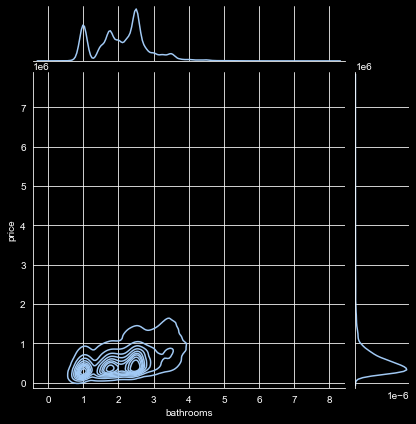

In [27]:
plt.style.use('dark_background')
sns.set_palette('flare')
sns.jointplot(x='bathrooms',y='price',data=final_df,kind='kde')

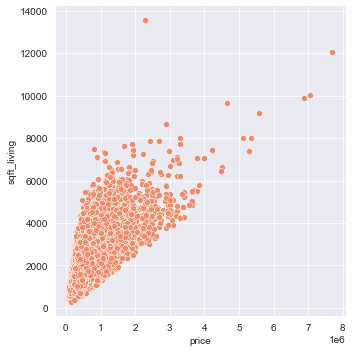

In [110]:
sns.set_style('darkgrid')
sns.set_palette('flare')
sns.relplot(x='price',y='sqft_living',data=final_df)

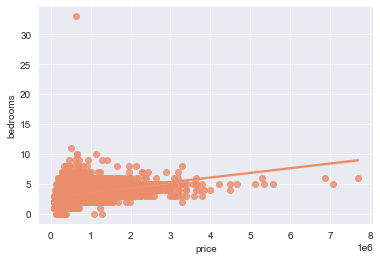

In [111]:
sns.regplot(data=final_df, x='price',y='bedrooms')

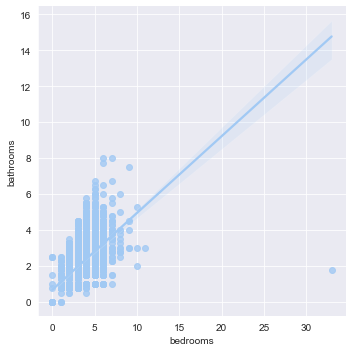

In [30]:
sns.lmplot(data=final_df, x='bedrooms',y='bathrooms')

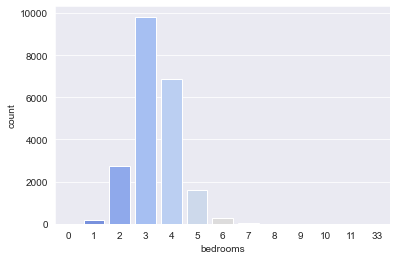

In [31]:
sns.countplot(x='bedrooms',data=final_df,palette='coolwarm')


### Checking Missing Values 

In [32]:
mis_val = [var for var in final_df.columns if final_df[var].isnull().sum()>0]

final_df[mis_val].isnull().sum()

view            25
yr_renovated    17
dtype: int64

In [33]:
# Missing Values Percentage in total data
final_df.isnull().mean()*100

id               0.000000
date             0.000000
price            0.000000
bedrooms         0.000000
bathrooms        0.000000
sqft_living      0.000000
sqft_lot         0.000000
floors           0.000000
waterfront       0.000000
view             0.115671
condition        0.000000
grade            0.000000
sqft_above       0.000000
sqft_basement    0.000000
yr_built         0.000000
yr_renovated     0.078656
zipcode          0.000000
lat              0.000000
long             0.000000
sqft_living15    0.000000
sqft_lot15       0.000000
dtype: float64

In [34]:
def drop_columns_with_max_missing_values(final_df):
    mis_var = [var for var in final_df.columns if final_df[var].isnull().sum() > 0]
    final_df[mis_var].isnull().sum()

    limit = np.abs((final_df.shape[0] * 0.6))
    var_to_be_dropped = [var for var in mis_var if final_df[var].isnull().sum() > limit]
    
    print('Columns with more than 60% missing values: \n', var_to_be_dropped)
    print('\n---- Dropping columns with more than 60% missing values ----\n')

    final_df.drop(columns=var_to_be_dropped, axis=1, inplace=True)
    
    print('Remaining columns are: \n', final_df.columns)
    return final_df

final_df = drop_columns_with_max_missing_values(final_df)

Columns with more than 60% missing values: 
 []

---- Dropping columns with more than 60% missing values ----

Remaining columns are: 
 Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [35]:
final_df.shape

(21613, 21)

### Handling Missing Values 

In [36]:
final_df.isnull().sum()

id                0
date              0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view             25
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated     17
zipcode           0
lat               0
long              0
sqft_living15     0
sqft_lot15        0
dtype: int64

In [37]:
def replace_missing_data(final_df, mis_vars):
    print('##### Replacing missing values with mode of features #####')
    for var in mis_vars:
        final_df[var] = final_df[var].fillna(final_df[var].mode()[0])
    return final_df

mis_var = [var for var in final_df.columns if final_df[var].isnull().sum() > 0]
final_df = replace_missing_data(final_df, mis_var)
final_df.head()

##### Replacing missing values with mode of features #####


id             date   price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900         3       1.00         1180   
1  6414100192  20141209T000000  538000         3       2.25         2570   
2  5631500400  20150225T000000  180000         2       1.00          770   
3  2487200875  20141209T000000  604000         4       3.00         1960   
4  1954400510  20150218T000000  510000         3       2.00         1680   

   sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
0      5650     1.0           0   0.0          3      7        1180   
1      7242     2.0           0   0.0          3      7        2170   
2     10000     1.0           0   0.0          3      6         770   
3      5000     1.0           0   0.0          5      7        1050   
4      8080     1.0           0   0.0          3      8        1680   

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0              0      1955           0.0    98178  47.5112 -122.257   
1            400      1951        1991.0    98125  47.7210 -122.319   
2              0      1933           0.0    98028  47.7379 -122.233   
3            910      1965           0.0    98136  47.5208 -122.393   
4              0      1987           0.0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503

In [38]:
final_df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

### Encoding categorical variables (Transforming Categorical Variables to Numerical Variables)

In [39]:
cat_vars = [var for var in final_df.columns if final_df[var].dtypes == 'O']
cat_vars

['date']

In [40]:
def encode_categorical_variables(final_df, cat_vars):
    
    print('Categorical variables: ', cat_vars)
    
    for i in range(len(cat_vars)):
        var = cat_vars[i]
        var_le = LabelEncoder()
        var_labels = var_le.fit_transform(final_df[var])
        var_mappings = {index: label for index, label in enumerate(var_le.classes_)}
        
        final_df[(var + '_labels')] = var_labels
        final_df.drop(columns=var, axis=1, inplace=True)
        
    return final_df

final_df = encode_categorical_variables(final_df, cat_vars)
final_df.head(10)

Categorical variables:  ['date']


id    price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0  7129300520   221900         3       1.00         1180      5650     1.0   
1  6414100192   538000         3       2.25         2570      7242     2.0   
2  5631500400   180000         2       1.00          770     10000     1.0   
3  2487200875   604000         4       3.00         1960      5000     1.0   
4  1954400510   510000         3       2.00         1680      8080     1.0   
5  7237550310  1225000         4       4.50         5420    101930     1.0   
6  1321400060   257500         3       2.25         1715      6819     2.0   
7  2008000270   291850         3       1.50         1060      9711     1.0   
8  2414600126   229500         3       1.00         1780      7470     1.0   
9  3793500160   323000         3       2.50         1890      6560     2.0   

   waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  \
0           0   0.0          3      7        1180              0      1955   
1           0   0.0          3      7        2170            400      1951   
2           0   0.0          3      6         770              0      1933   
3           0   0.0          5      7        1050            910      1965   
4           0   0.0          3      8        1680              0      1987   
5           0   0.0          3     11        3890           1530      2001   
6           0   0.0          3      7        1715              0      1995   
7           0   0.0          3      7        1060              0      1963   
8           0   0.0          3      7        1050            730      1960   
9           0   0.0          3      7        1890              0      2003   

   yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  \
0           0.0    98178  47.5112 -122.257           1340        5650   
1        1991.0    98125  47.7210 -122.319           1690        7639   
2           0.0    98028  47.7379 -122.233           2720        8062   
3           0.0    98136  47.5208 -122.393           1360        5000   
4           0.0    98074  47.6168 -122.045           1800        7503   
5           0.0    98053  47.6561 -122.005           4760      101930   
6           0.0    98003  47.3097 -122.327           2238        6819   
7           0.0    98198  47.4095 -122.315           1650        9711   
8           0.0    98146  47.5123 -122.337           1780        8113   
9           0.0    98038  47.3684 -122.031           2390        7570   

   date_labels  
0          164  
1          220  
2          290  
3          220  
4          283  
5           10  
6           56  
7          251  
8          339  
9          305

### Checking Outliers & Removing them

In [41]:
final_df.shape

(21613, 21)

In [42]:
# Using Z-score as a threhold (WE can also find outliers using IQR)

z = np.abs(stats.zscore(final_df))
no_out_df = final_df[(z<3).all(axis=1)]
no_out_df.shape

(18703, 21)

### Checking for Multi-Colinerity

In [45]:
correlation = no_out_df.corr()

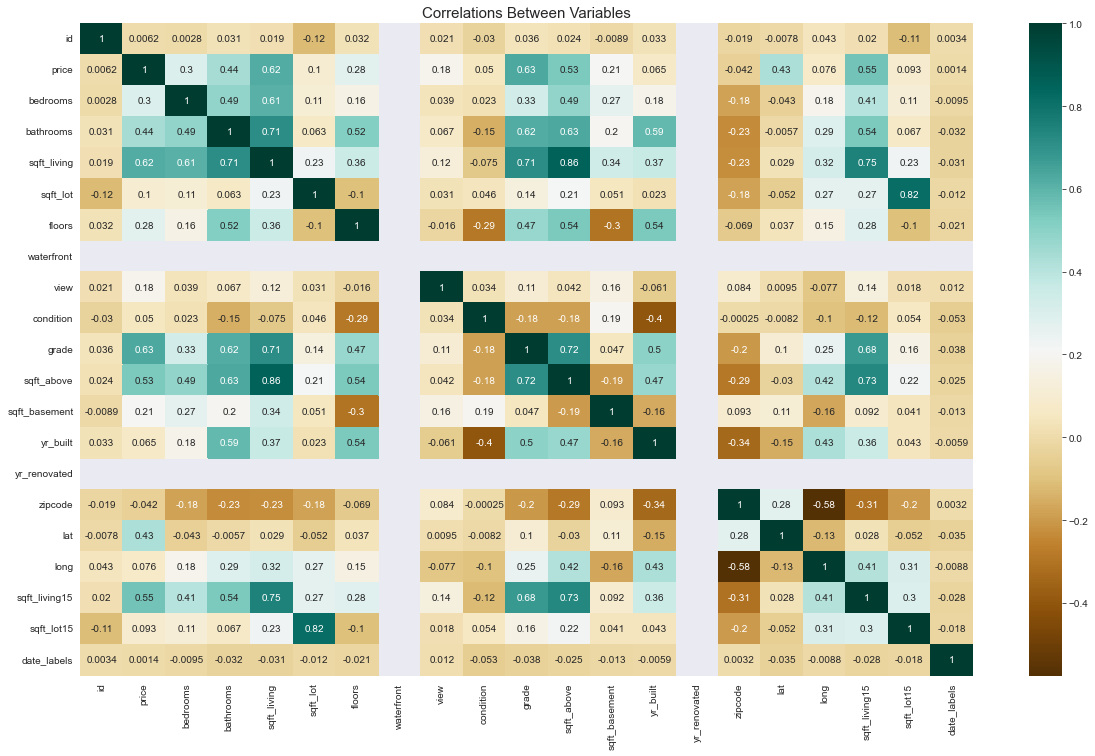

In [46]:
plt.figure(figsize=(20,12))
plt.title("Correlations Between Variables", size=15)
sns.heatmap(correlation, cmap='BrBG', annot=True)

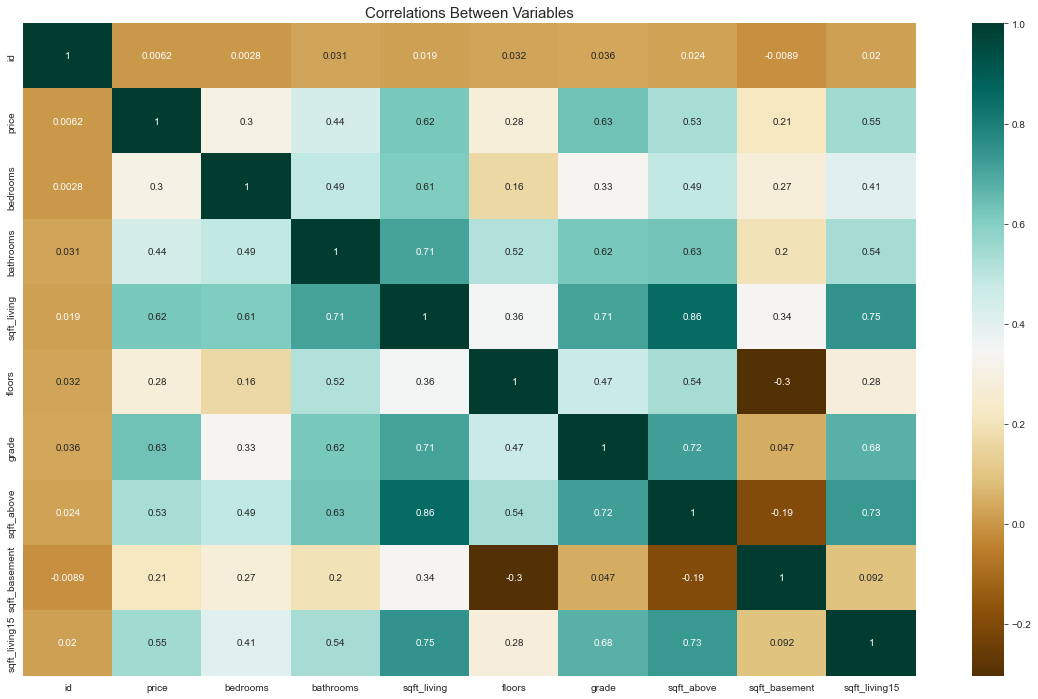

In [47]:
no_out_df.drop(columns=['date_labels','zipcode','yr_renovated','view','sqft_lot','lat','long','waterfront','condition','sqft_lot15','view','yr_built'], axis=1, inplace=True)
plt.figure(figsize=(20,12))
plt.title("Correlations Between Variables", size=15)
sns.heatmap(no_out_df.corr(), cmap='BrBG',annot=True)

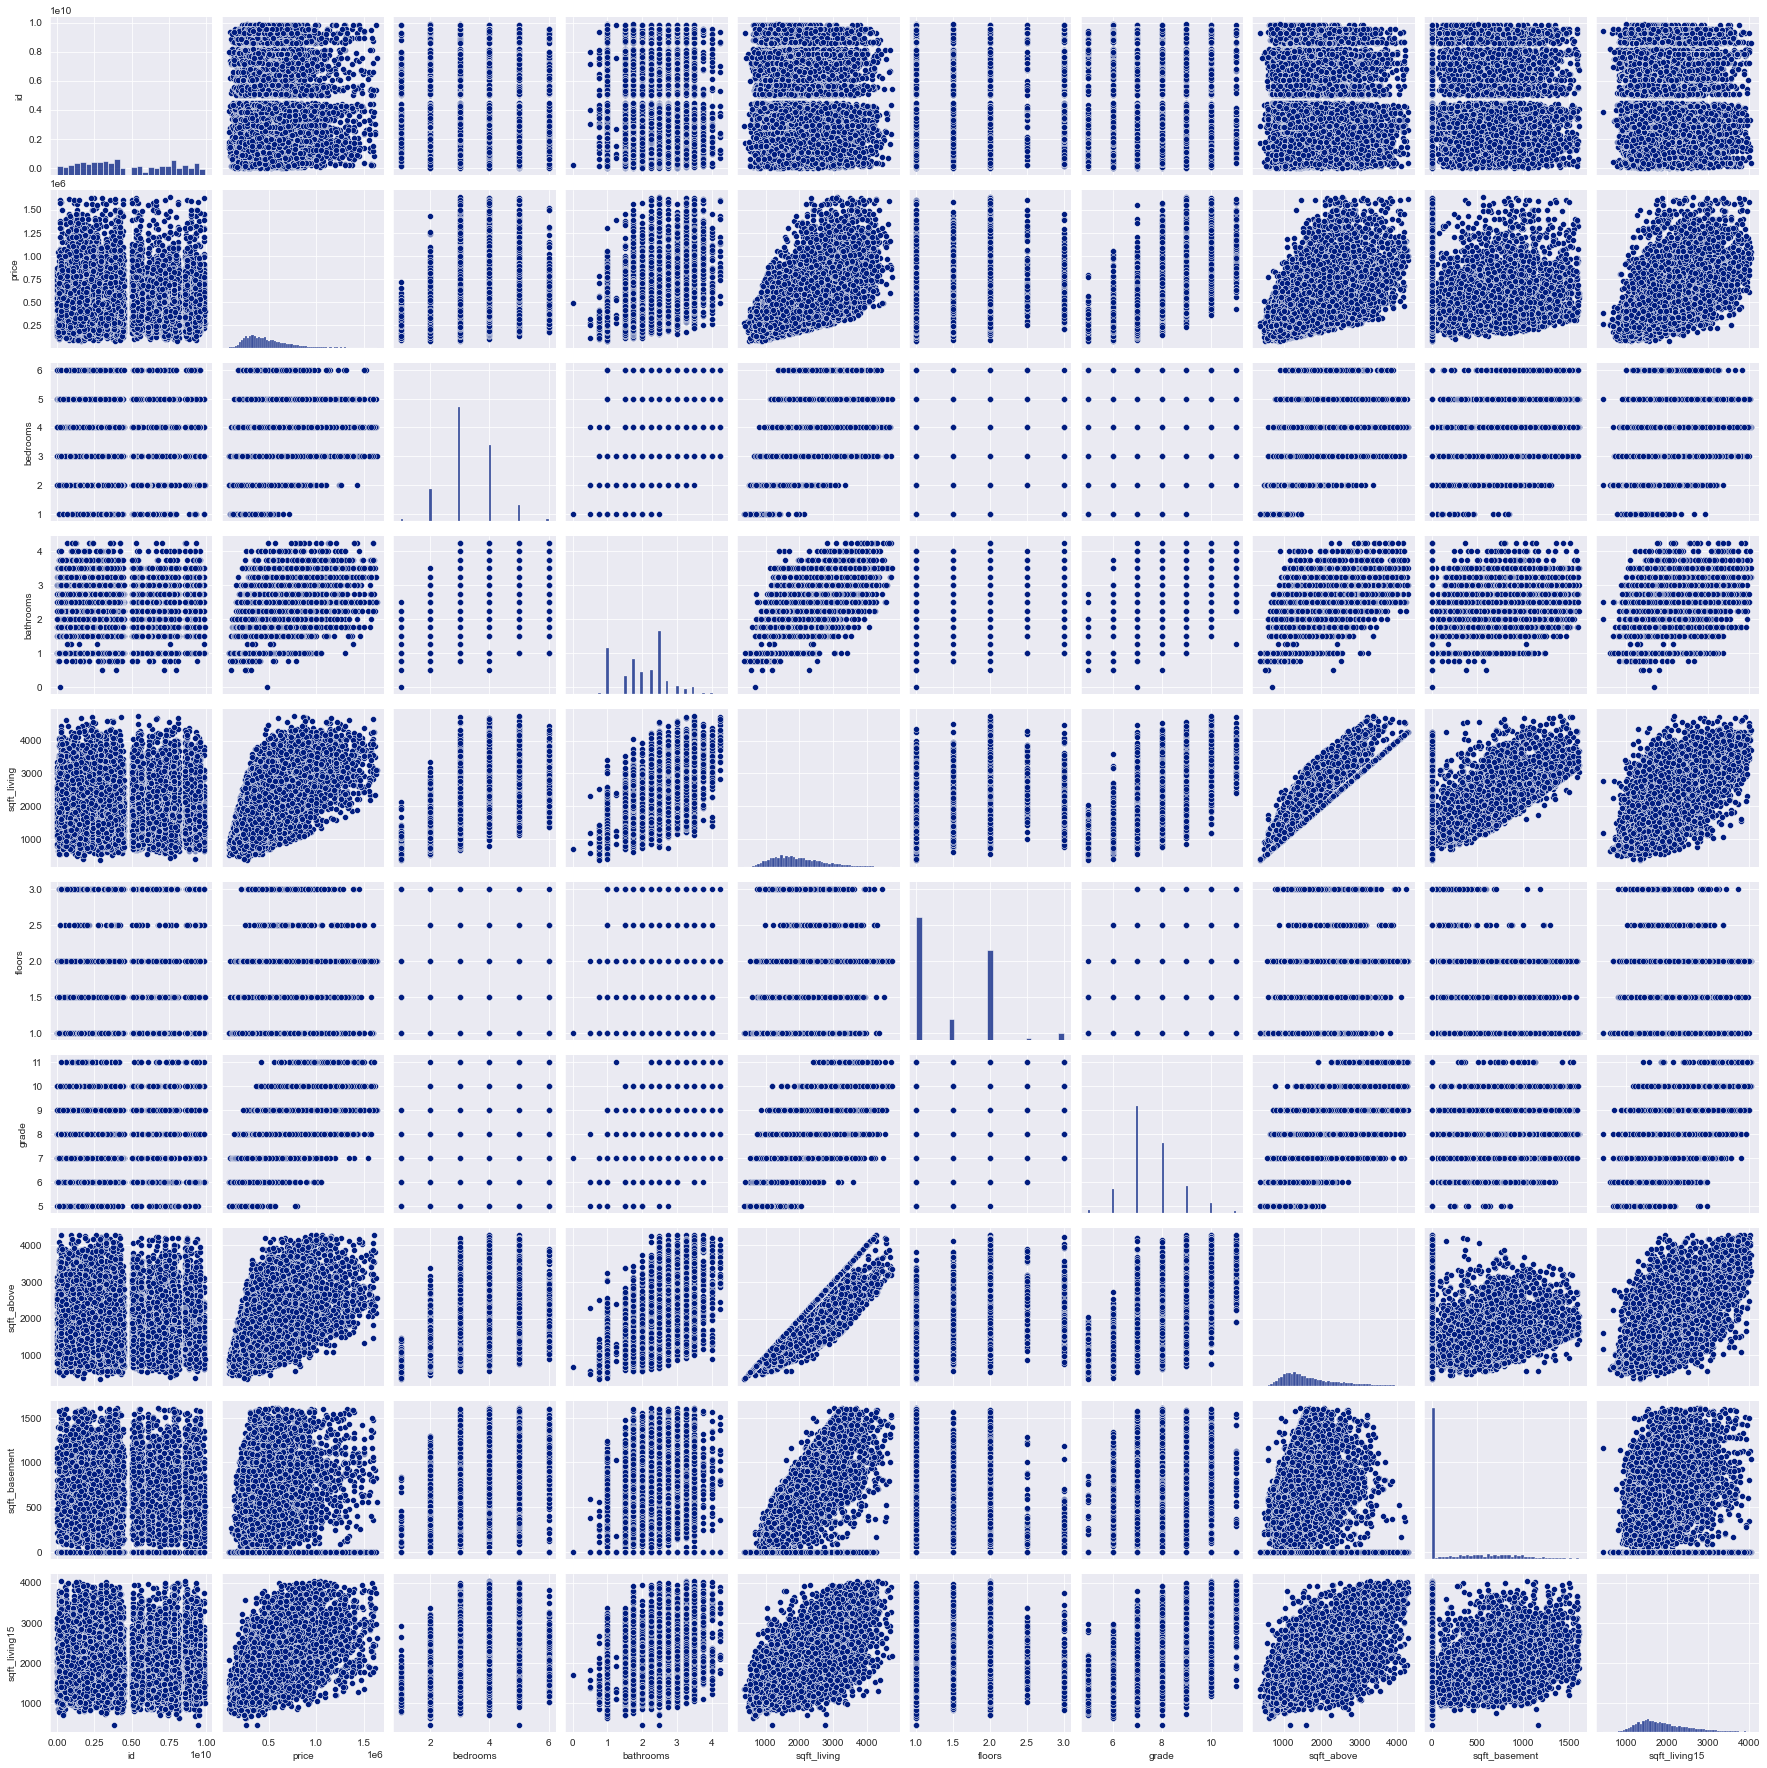

In [180]:
sns.pairplot(no_out_df)


### Re-Examining Dataset

In [48]:
modeling_df = no_out_df
modeling_df.shape

(18703, 10)

In [49]:
modeling_df.head()

id   price  bedrooms  bathrooms  sqft_living  floors  grade  \
0  7129300520  221900         3       1.00         1180     1.0      7   
2  5631500400  180000         2       1.00          770     1.0      6   
3  2487200875  604000         4       3.00         1960     1.0      7   
4  1954400510  510000         3       2.00         1680     1.0      8   
6  1321400060  257500         3       2.25         1715     2.0      7   

   sqft_above  sqft_basement  sqft_living15  
0        1180              0           1340  
2         770              0           2720  
3        1050            910           1360  
4        1680              0           1800  
6        1715              0           2238

### Visualizing the Correlation between each column and the target variable using jointplot visualization

<Figure size 720x576 with 0 Axes>

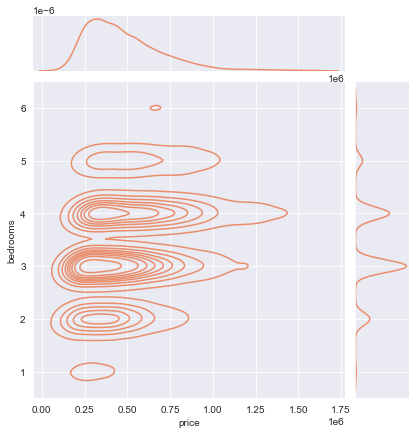

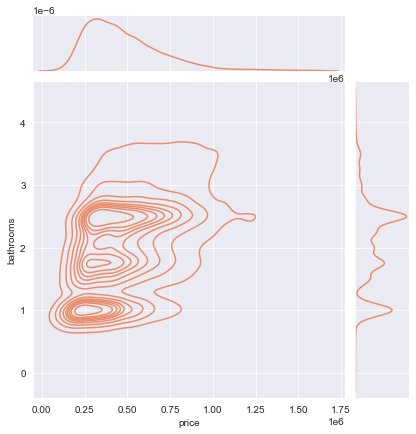

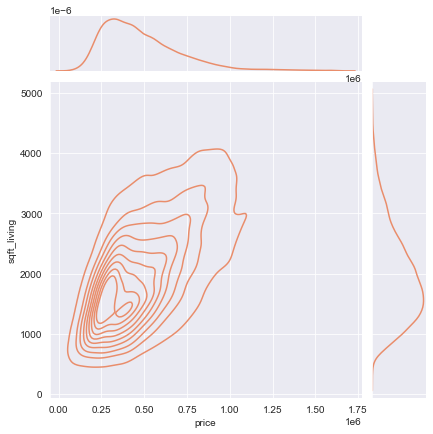

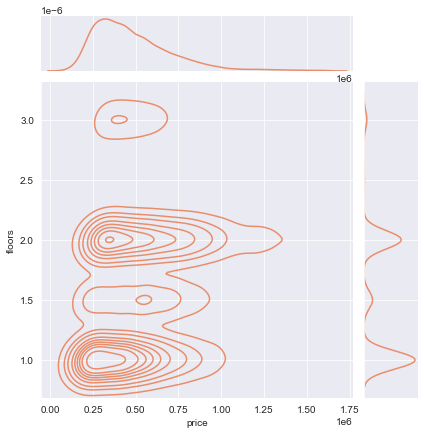

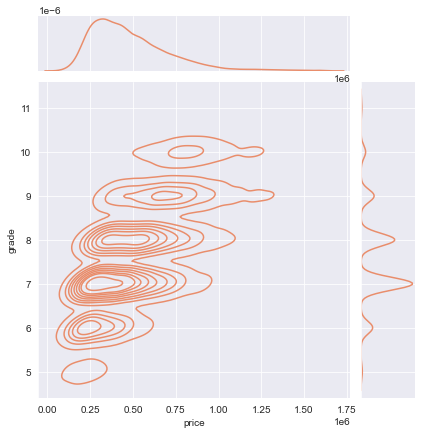

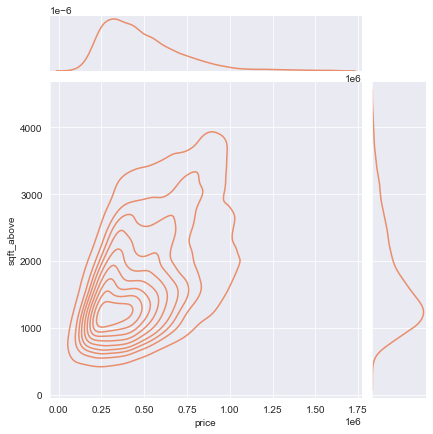

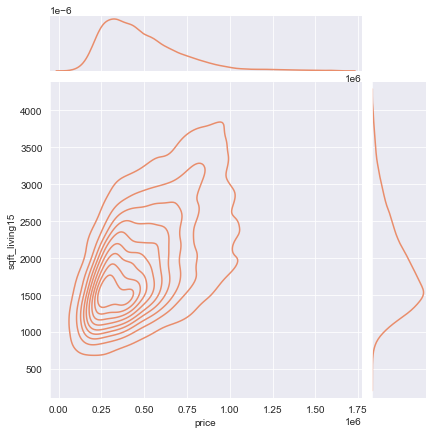

In [112]:
plt.figure(figsize=(10,8))
sns.jointplot(x=modeling_df["price"], y=modeling_df["bedrooms"], kind="kde")
sns.jointplot(x=modeling_df["price"], y=modeling_df["bathrooms"], kind="kde")
sns.jointplot(x=modeling_df["price"], y=modeling_df["sqft_living"], kind="kde")
sns.jointplot(x=modeling_df["price"], y=modeling_df["floors"], kind="kde")
sns.jointplot(x=modeling_df["price"], y=modeling_df["grade"], kind="kde")
sns.jointplot(x=modeling_df["price"], y=modeling_df["sqft_above"], kind="kde")
sns.jointplot(x=modeling_df["price"], y=modeling_df["sqft_living15"], kind="kde")
plt.show()

In [51]:
# Saving final Dataset

modeling_df.to_csv('finalModel.csv', index=False)

# Buliding a Regression Model 
                                                                                        
We have done EDA and Feature Engineering on raw dataset and got final dataset with neccessary changes(removing duplicates, scaling the data, Multicolinearity, replacing null values, Removing outliers)

In [52]:
import xgboost

from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso, SGDRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [53]:
df = pd.read_csv('finalModel.csv')
df.shape

(18703, 10)

In [54]:
df.head(5)

id   price  bedrooms  bathrooms  sqft_living  floors  grade  \
0  7129300520  221900         3       1.00         1180     1.0      7   
1  5631500400  180000         2       1.00          770     1.0      6   
2  2487200875  604000         4       3.00         1960     1.0      7   
3  1954400510  510000         3       2.00         1680     1.0      8   
4  1321400060  257500         3       2.25         1715     2.0      7   

   sqft_above  sqft_basement  sqft_living15  
0        1180              0           1340  
1         770              0           2720  
2        1050            910           1360  
3        1680              0           1800  
4        1715              0           2238

### Splitting the dataset into Train-Test sets

In [55]:
X = df.drop('price', axis=1)
y = df['price']

new_df = df.copy()
print(X, X.shape,y, y.shape)

               id  bedrooms  bathrooms  sqft_living  floors  grade  \
0      7129300520         3       1.00         1180     1.0      7   
1      5631500400         2       1.00          770     1.0      6   
2      2487200875         4       3.00         1960     1.0      7   
3      1954400510         3       2.00         1680     1.0      8   
4      1321400060         3       2.25         1715     2.0      7   
...           ...       ...        ...          ...     ...    ...   
18698   263000018         3       2.50         1530     3.0      8   
18699  6600060120         4       2.50         2310     2.0      8   
18700  1523300141         2       0.75         1020     2.0      7   
18701   291310100         3       2.50         1600     2.0      8   
18702  1523300157         2       0.75         1020     2.0      7   

       sqft_above  sqft_basement  sqft_living15  
0            1180              0           1340  
1             770              0           2720  
2        

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 23)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((14027, 9), (14027,), (4676, 9), (4676,))

### Feature Scaling

In [57]:
train_vars = [var for var in X_train.columns if var not in ['id', 'price']]
len(train_vars)

8

In [58]:
scaler = StandardScaler()

scaler.fit(X_train[train_vars]) 

X_train[train_vars] = scaler.transform(X_train[train_vars])

X_test[train_vars] = scaler.transform(X_test[train_vars])

### Now we drop  id as it does not serve purpose for model prediction 

In [59]:
X_train_new = X_train.copy()
X_test_new = X_test.copy()

X_train.drop(columns='id', axis=1, inplace=True)
X_test.drop(columns='id', axis=1, inplace=True)

In [60]:
def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5)).mean()
    return rmse
    

def evaluation(y, predictions):
    mae = mean_absolute_error(y, predictions)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mean_squared_error(y, predictions))
    r_squared = r2_score(y, predictions)
    return mae, mse, rmse, r_squared

In [61]:
models = pd.DataFrame(columns=["Model","MAE","MSE","RMSE","R2 Score","RMSE (Cross-Validation)"])

## Linear Regression Model


In [62]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
predictions = lin_reg.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(lin_reg)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "LinearRegression","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 125387.05696552503
MSE: 28538299028.682514
RMSE: 168932.8240120389
R2 Score: 0.4905212177239445
------------------------------
RMSE Cross-Validation: 167190.5266663285


### Ridge Regression Model

In [63]:
ridge = Ridge()
ridge.fit(X_train, y_train)
predictions = ridge.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(ridge)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "Ridge","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 125387.30219027305
MSE: 28538394476.190567
RMSE: 168933.10651317157
R2 Score: 0.4905195137513242
------------------------------
RMSE Cross-Validation: 167190.50212730802


### Lasso Regression

In [64]:
lasso = Lasso()
lasso.fit(X_train, y_train)
predictions = lasso.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(lasso)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "Lasso","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 125387.01426102714
MSE: 28538252407.555305
RMSE: 168932.6860248049
R2 Score: 0.49052205002565574
------------------------------
RMSE Cross-Validation: 167190.51724091606


### Elastic Net

In [65]:
elastic_net = ElasticNet()
elastic_net.fit(X_train, y_train)
predictions = elastic_net.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(elastic_net)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "ElasticNet","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 129632.02307759742
MSE: 30199320049.258797
RMSE: 173779.5156203941
R2 Score: 0.460867909863949
------------------------------
RMSE Cross-Validation: 170736.7659509351


### Support Vector Machine

In [137]:
svr = SVR(C=100000)
svr.fit(X_train, y_train)
predictions = svr.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(svr)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "SVR","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 113192.6986620884
MSE: 24120662636.069317
RMSE: 155308.28257394812
R2 Score: 0.5693868854914905
------------------------------
RMSE Cross-Validation: 236458.32556925682


## XG Boost Regression Model


In [138]:
xgb = XGBRegressor(n_estimators=1000, learning_rate=0.01)
xgb.fit(X_train, y_train)
predictions = xgb.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(xgb)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "XGBRegressor","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 114854.96901398097
MSE: 24067033724.17712
RMSE: 155135.53340281884
R2 Score: 0.5703442933838869
------------------------------
RMSE Cross-Validation: 146145.0252628778


## Random Forest Regression Model

In [66]:
random_forest = RandomForestRegressor(n_estimators=100)
random_forest.fit(X_train, y_train)
predictions = random_forest.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(random_forest)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "RandomForestRegressor","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 117759.93334354852
MSE: 25574022482.78171
RMSE: 159918.79965401726
R2 Score: 0.5434408399977578
------------------------------
RMSE Cross-Validation: 152665.01348470972


### Polynomial Regression 

In [67]:
poly_reg = PolynomialFeatures(degree=2)
X_train_2d = poly_reg.fit_transform(X_train)
X_test_2d = poly_reg.transform(X_test)

lin_reg = LinearRegression()
lin_reg.fit(X_train_2d, y_train)
predictions = lin_reg.predict(X_test_2d)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(lin_reg)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "Polynomial Regression (degree=2)","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 120109.6146426107
MSE: 25761713804.37989
RMSE: 160504.56007347544
R2 Score: 0.5400900885785679
------------------------------
RMSE Cross-Validation: 167190.5266663285


### Model Comparison

## The less the Root Mean Squared Error (RMSE), The better the model is.

In [68]:
models.sort_values(by="RMSE (Cross-Validation)")

Model            MAE           MSE  \
4             RandomForestRegressor  117759.933344  2.557402e+10   
1                             Ridge  125387.302190  2.853839e+10   
2                             Lasso  125387.014261  2.853825e+10   
0                  LinearRegression  125387.056966  2.853830e+10   
5  Polynomial Regression (degree=2)  120109.614643  2.576171e+10   
3                        ElasticNet  129632.023078  3.019932e+10   

            RMSE  R2 Score  RMSE (Cross-Validation)  
4  159918.799654  0.543441            152665.013485  
1  168933.106513  0.490520            167190.502127  
2  168932.686025  0.490522            167190.517241  
0  168932.824012  0.490521            167190.526666  
5  160504.560073  0.540090            167190.526666  
3  173779.515620  0.460868            170736.765951

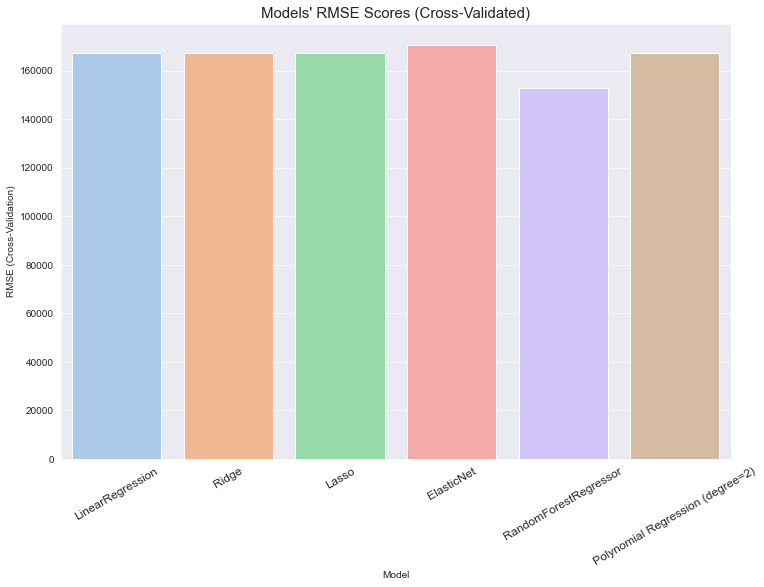

In [72]:
plt.figure(figsize=(12,8))
sns.barplot(x=models["Model"], y=models["RMSE (Cross-Validation)"])
plt.title("Models' RMSE Scores (Cross-Validated)", size=15)
plt.xticks(rotation=30, size=12)
plt.show()

## Cross Validation & Hyperparameter Optimization for Random Forest

In [70]:
scores = cross_val_score(random_forest, X_train, y_train, scoring="neg_mean_squared_error", cv = 5)

In [73]:
random_forest_rmse_scores = np.sqrt(-scores)
random_forest_rmse_scores

array([160497.97955733, 157730.59950564, 158472.65781728, 161186.79171658,
       159504.04339117])

In [74]:
param_grid = [
    {'n_estimators': [300, 400, 500], 'max_features': [2, 4, 6]},
    {'bootstrap': [False], 'n_estimators': [300, 400, 500], 'max_features': [2, 4, 6]}]

forest_regressor = RandomForestRegressor()

grid_search = GridSearchCV(forest_regressor, param_grid, scoring='neg_mean_squared_error',return_train_score=True,cv=3)

In [75]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6],
                          'n_estimators': [300, 400, 500]},
                         {'bootstrap': [False], 'max_features': [2, 4, 6],
                          'n_estimators': [300, 400, 500]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [76]:
grid_search.best_params_

{'max_features': 2, 'n_estimators': 500}

In [77]:
grid_search.best_estimator_

RandomForestRegressor(max_features=2, n_estimators=500)

In [78]:
final_predictor = grid_search.best_estimator_
final_predictor.fit(X_train, y_train)
final_pred = final_predictor.predict(X_test)

In [79]:
print('Mean Absolute Error : {}'.format(mean_absolute_error(y_test, final_pred)))
print()
print('Mean Squared Error : {}'.format(mean_squared_error(y_test, final_pred)))
print()
print('Root Mean Squared Error : {}'.format(sqrt(mean_squared_error(y_test, final_pred))))
print("\nR2: {}".format(r2_score(y_test,final_pred)))

Mean Absolute Error : 115752.3448375993

Mean Squared Error : 24793592919.516567

Root Mean Squared Error : 157459.8136653177

R2: 0.5573734259288583


# Saving the model

In [80]:
import pickle
file_name = 'final_pickle_model.pickle'
pickle.dump(final_predictor,open(file_name,'wb'))

## Feature importance

In [81]:
feature_importances = grid_search.best_estimator_.feature_importances_

attrs = list(df.select_dtypes(include = ['float64','int64']))

sorted(zip(attrs, feature_importances), reverse=True)

[('sqft_living', 0.17950845033674065),
 ('sqft_above', 0.21418830783348564),
 ('price', 0.0788396015299465),
 ('id', 0.03787950402835077),
 ('grade', 0.07097810684343704),
 ('floors', 0.15439098872420223),
 ('bedrooms', 0.22300317141615436),
 ('bathrooms', 0.04121186928768285)]

### Saving Prediction

In [99]:
model_pred = pd.DataFrame({'id':X_test_new.id, 'price':final_pred,})
model_pred.to_csv('model_predictions.csv',index=False)
model_pred.head()

id          price
16528  3356402020  287845.220000
12099  7881500330  488570.562000
10878  6072100790  455814.898000
2495   1455600015  556708.785333
4960   4457300630  582338.592000

In [100]:
model_pred.size

9352

In [101]:
model_pred.shape

(4676, 2)

Text(0.5, 1.0, 'Scatter Plot ')

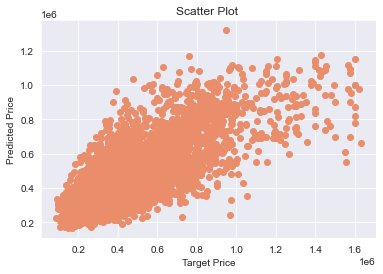

In [102]:
plt.scatter(y_test, final_pred)
plt.xlabel("Target Price")
plt.ylabel("Predicted Price")
plt.title( "Scatter Plot " )

Text(0.5, 1.0, 'Distribution Of price in predicted data ')

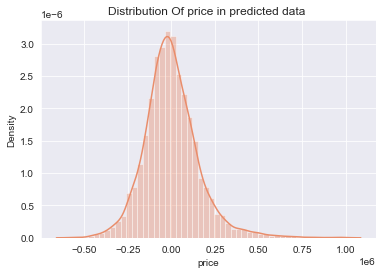

In [106]:
sns.distplot((y_test-final_pred))
plt.title( "Distribution Of price in predicted data " )